In [66]:
# .libPaths("~/R/prs-libs")
.libPaths("/home/daniel/R/x86_64-pc-linux-gnu-library/4.2")
library(Sleuth2)
library(ggplot2)
library(cowplot)
library(olsrr)
library(moments)
library(vtable)
library(car)

In [67]:
#install.packages("Sleuth2", dependencies=T, lib="/home/ivan/R/prs-libs")
#install.packages("Sleuth2", dependencies=T)

#### P≈ô√≠prava dat

Pomoc√≠ vzorce vypoƒç√≠t√°me, jakou √∫lohu budeme ≈ôe≈°it.

In [68]:
K = 20
L = nchar("Yannick")
M = (( (K+L)*47 ) %% 11 ) + 1
M

[1] 5

ƒå√≠slo 5 odpov√≠d√° datasetu *case1202*, kter√Ω zkoum√° platy zamƒõstnac≈Ø banky z let 1965 - 1975. Banka byla za≈æalov√°na kv≈Øli diskriminaci na z√°kladƒõ pohlav√≠, tak≈æe je mo≈æn√©, ≈æe platy jednoho pohlav√≠ budou ni≈æ≈°√≠, ne≈æ platy opaƒçn√©ho. To se mimo jin√© budeme tak√© sna≈æit prozkoumat.

Neprve si ale je≈°tƒõ p≈ôejmenujeme sloupec *Sal77* na *Sal75*. Podle manu√°lu se toti≈æ jedn√° o plat z b≈ôezna 1975, ne 1977, tak a≈• jsou n√°zvy konzistentn√≠.

In [69]:
df = case1202
names(df)[names(df) == 'Sal77'] = 'Sal75'
df <- transform(df, SalInc=Sal75-Bsal)

Dataset obsahuje celkem 93 ≈ô√°dk≈Ø a 7 sloupc≈Ø:

* Bsal - Roƒçn√≠ n√°stupn√≠ v√Ω≈°e platu.
* Sal75 - Plat v b≈ôeznu 1975.
* Sex - Pohlav√≠ zamƒõstnance.
* Senior - Poƒçet mƒõs√≠c≈Ø od prvn√≠ho n√°stupu do pr√°ce (jak dlouho v t√©to bance pracuj√≠).
* Age - Vƒõk zamƒõstnance v mƒõs√≠c√≠ch.
* Educ - Vzdƒõl√°n√≠ zamƒõstnance v roc√≠ch.
* Exper - P≈ôechoz√≠ pracovn√≠ zku≈°enosti p≈ôed n√°stupem do t√©to banky.

V manu√°lu to nen√≠ napsan√©, ale p≈ôedpokl√°d√°me, ≈æe v√Ω≈°e plat≈Ø je uveden√° v USD.

Pod√≠v√°me se na prvn√≠ch p√°r z√°znam≈Ø a souhrn√© informace o datasetu.

In [70]:
head(df)
summary(df)

Bsal Sal75 Sex  Senior Age Educ Exper SalInc
1 5040 12420 Male 96     329 15   14.0   7380 
2 6300 12060 Male 82     357 15   72.0   5760 
3 6000 15120 Male 67     315 15   35.5   9120 
4 6000 16320 Male 97     354 12   24.0  10320 
5 6000 12300 Male 66     351 12   56.0   6300 
6 6840 10380 Male 92     374 15   41.5   3540

      Bsal          Sal75           Sex         Senior           Age       
 Min.   :3900   Min.   : 7860   Female:61   Min.   :65.00   Min.   :280.0  
 1st Qu.:4980   1st Qu.: 9000   Male  :32   1st Qu.:74.00   1st Qu.:349.0  
 Median :5400   Median :10020               Median :84.00   Median :468.0  
 Mean   :5420   Mean   :10393               Mean   :82.28   Mean   :474.4  
 3rd Qu.:6000   3rd Qu.:11220               3rd Qu.:90.00   3rd Qu.:590.0  
 Max.   :8100   Max.   :16320               Max.   :98.00   Max.   :774.0  
      Educ           Exper           SalInc     
 Min.   : 8.00   Min.   :  0.0   Min.   : 2280  
 1st Qu.:12.00   1st Qu.: 35.5   1st Qu.: 3720  
 Median :12.00   Median : 70.0   Median : 4680  
 Mean   :12.51   Mean   :100.9   Mean   : 4973  
 3rd Qu.:15.00   3rd Qu.:144.0   3rd Qu.: 5940  
 Max.   :16.00   Max.   :381.0   Max.   :10320  

V datasetu jsou z√°znamy o 61 ≈æen√°ch a 32 mu≈æ√≠ch s vƒõky od 280 mƒõs√≠c≈Ø (23 let) do 774 mƒõs√≠c≈Ø (64 let), p≈ôiƒçem≈æ pr≈Ømƒõrn√Ω vƒõk je 474 mƒõs√≠c≈Ø (39 let).

Minim√°ln√≠ doba vzdƒõl√°n√≠ zamƒõstnanc≈Ø je 8 let a maxim√°ln√≠ 16 let. Do pr√°ce nƒõkte≈ô√≠ nastoupili i s nulovou p≈ôedchoz√≠ zku≈°enost√≠, nebo naopak a≈æ s 381 mƒõs√≠ci (31 let) zku≈°enost√≠.

Zamƒõstnanci v bance pracovali pr≈Ømƒõrnƒõ 82 mƒõs√≠c≈Ø (skoro 7 let).

V√Ω≈°e n√°stupn√≠ho platu se pohybuje od 3900 USD do 8100 USD, kde≈æto v roce 1975 v rozmez√≠ od 7860 USD do 16320 USD. Je vidƒõt, ≈æe se plat celkem v√Ωraznƒõ zvedal. Pr≈Ømƒõrn√Ω n√°stupn√≠ plat je 5420 USD a pr≈Ømƒõrn√Ω plat v roce 1975 je 10393 USD, tedy t√©mƒõ≈ô dvakr√°t vy≈°≈°√≠.

In [71]:
summ <- c('mean(x)', 'sd(x)', 'min(x)', 'pctile(x)[25]', 'median(x)', 'pctile(x)[75]', 
          'max(x)', 'IQR(x)', 'skewness(x)', 'kurtosis(x)-3')
sumtable(df, out="return", group="Sex", group.long=T, summ=summ, factor.numeric=TRUE)

Variable    Mean    Sd       Min  Pctile[25] Median Pctile[75] Max      
1  Sex: Female                                                             
2  Bsal        5138.9  539.871  3900 4800       5220   5400       6300     
3  Sal75       9717    1253.001 7860 8820       9600   10320      13560    
4  Senior      81.6    10.53    65   72         82     89         98       
5  Age         500.8   145.068  280  349        528    604        774      
6  Educ        12      2.309    8    12         12     12         16       
7  Exper       99.8    85.402   0    36         82     144        381      
8  SalInc      4578.2  1333.874 2280 3540       4440   5220       8760     
9                                                                          
10 Sex: Male                                                               
11 Bsal        5956.9  690.733  4620 5400       6000   6075       8100     
12 Sal75       11681.3 1963.21  7860 10605.001  11610  12465      16320.001
13 Senior      83.7    9.721    66   78         84.5   91         97       
14 Age         424     116.679  293  350.25     366.5  491        690      
15 Educ        13.5    1.866    8    12         15     15         16       
16 Exper       103     102.097  7    34.625     56     142.75     359      
17 SalInc      5724.4  1866.193 2760 4125       5700   6600       10320.001
   IQR      Skewness Kurtosis-3
1                              
2  600      -0.076   -0.36     
3  1500     1.051    1.14      
4  17       -0.028   -1.234    
5  255      0.028    -1.251    
6  0        -0.312   -0.447    
7  108      1.027    0.771     
8  1680     0.905    0.954     
9                              
10                             
11 675      0.731    1.326     
12 1859.999 0.349    -0.04     
13 13       -0.524   -0.64     
14 140.75   1.124    -0.012    
15 3        -0.715   0.176     
16 108.125  1.239    0.24      
17 2475     0.44     -0.226

Vzhledem k tomu, ≈æe t√©matem datasetu je nerovnost v platech mu≈æ≈Ø a ≈æen, jsme udƒõlali shrnut√≠ i podle tƒõchto dvou kategori√≠. Na prvn√≠ pohled vid√≠me, ≈æe ≈æeny p≈ôi n√°stupu dostaly men≈°√≠ plat, v roce 1975 mƒõly ni≈æ≈°√≠ platy a jejich platy m√©nƒõ rostly. Mu≈æi jsou mlad≈°√≠ ne≈æ ≈æeny, ale pracovn√≠ zku≈°enosti a senioritu v r√°mci banky maj√≠ podobnou. Sice to je jen spekulace, ale tuto skuteƒçnost by mohlo ovliv≈àovat to, ≈æe vƒõt≈°inou ≈æeny musely p≈ôeru≈°it sv√© zamƒõstn√°n√≠ kv≈Øli dƒõtem. Je patrn√©, ≈æe mu≈æi maj√≠ lehce del≈°√≠ vzdƒõl√°n√≠, kter√© by tak√© mƒõlo korelovat s v√Ω≈°√≠ platu. Ot√°zkou je, jak√° z tƒõchto vlastnost√≠ m√° na v√Ω≈°i platu nejvy≈°≈°√≠ vliv - zda-li to je hlavnƒõ pohlav√≠, nebo to t≈ôeba m≈Ø≈æe b√Ωt vzdƒõl√°n√≠m?

Pro lep≈°√≠ p≈ôehled by bylo dobr√© vyu≈æ√≠t p√°r vizualizac√≠.

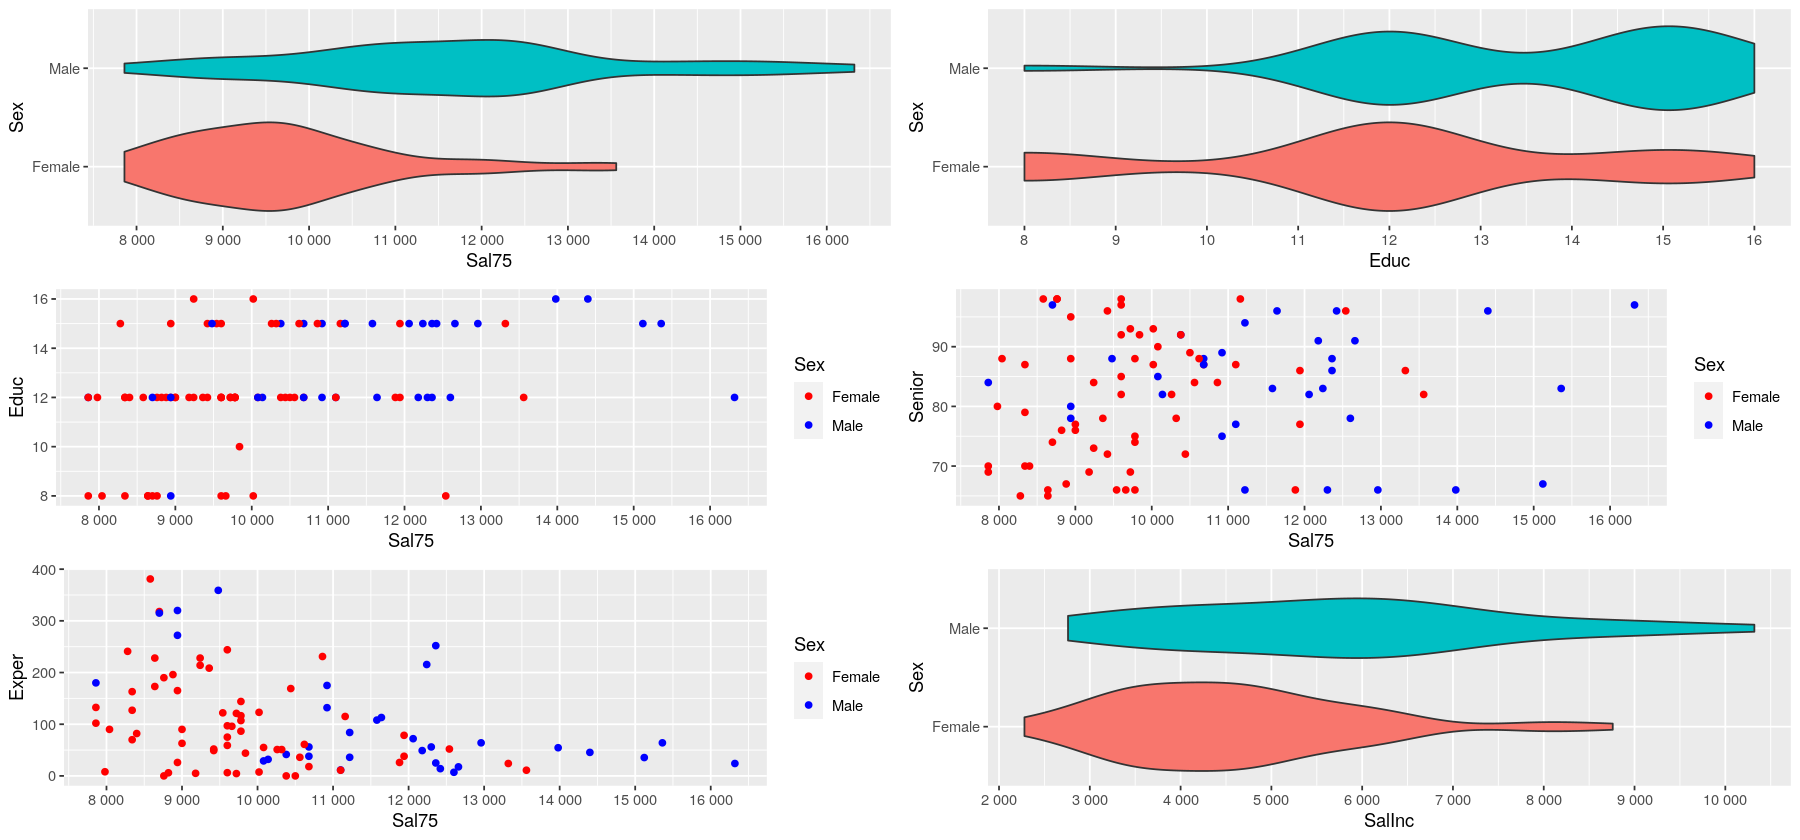

In [72]:
options(repr.plot.width = 15, repr.plot.height = 7)
p = ggplot(df, aes(x=Sal75, y=Sex, fill=Sex)) +
        geom_violin(show.legend=F) + 
        scale_x_continuous(labels = scales::number, n.breaks=10)
q = ggplot(df, aes(x=Educ, y=Sex, fill=Sex)) +
        geom_violin(show.legend=F) + 
        scale_x_continuous(labels = scales::number, n.breaks=10)
r = ggplot(df, aes(x=Sal75, y=Educ, color=Sex)) +
        geom_point() + 
        scale_x_continuous(labels = scales::number, n.breaks=10) +
        scale_color_manual(values = c("Male" = "blue", "Female" = "red"))
s = ggplot(df, aes(x=Sal75, y=Senior, color=Sex)) +
        geom_point() + 
        scale_x_continuous(labels = scales::number, n.breaks=10) +
        scale_color_manual(values = c("Male" = "blue", "Female" = "red"))
t = ggplot(df, aes(x=Sal75, y=Exper, color=Sex)) +
        geom_point() + 
        scale_x_continuous(labels = scales::number, n.breaks=10) +
        scale_color_manual(values = c("Male" = "blue", "Female" = "red"))
u = ggplot(df, aes(x=SalInc, y=Sex, fill=Sex)) +
        geom_violin(show.legend=F) + 
        scale_x_continuous(labels = scales::number, n.breaks=10)
plot_grid(p, q, r, s, t, u, ncol=2)

Z grafu rozdƒõlen√≠ plat≈Ø seskupen√©ho podle pohlav√≠ je vidƒõt, ≈æe mu≈æi v bance maj√≠ vy≈°≈°√≠ platy ne≈æ ≈æeny. Z grafu vzdƒõlan√≠ je vidƒõt, ≈æe mu≈æi ƒçastƒõji absolvovali del≈°√≠ vzdƒõl√°n√≠, kter√© by mohlo v√©st k vƒõt≈°√≠m p≈ô√≠jm≈Øm. To sice je obecnƒõ pravda, ale neznamen√° to, ≈æe pohlav√≠ zamƒõstnanc≈Ø nem√° vliv na plat, jak je ilustrov√°no v t≈ôet√≠m grafu, ze kter√©ho je patrn√©, ≈æe vy≈°≈°√≠ vzdƒõl√°n√≠ vede v pr≈Ømƒõru k vy≈°≈°√≠m p≈ô√≠jm≈Øm, ale je vidƒõt, ≈æe u podobnƒõ vzdƒõlan√Ωch mu≈æ≈Ø a ≈æen je st√°le rozd√≠l v p≈ô√≠jmech. Podobnƒõ je to i senioritou a expert√≠zou - i p≈ôesto ≈æe jsou na tom obƒõ pohlav√≠ podobnƒõ, dost√°vaj√≠ mu≈æi vy≈°≈°√≠ platy.

### √öloha 2

Prozkoum√°me, jestli je nƒõjak√° z√°vislot v√Ω≈°e platu v roce 1975 na vƒõku zamƒõstnanc≈Ø.

In [73]:
fit_numeric = lm(Sal75 ~ Age, df)

Warning message in predict.lm(fit_numeric, interval = "prediction"):
‚Äúpredictions on current data refer to _future_ responses
‚Äù


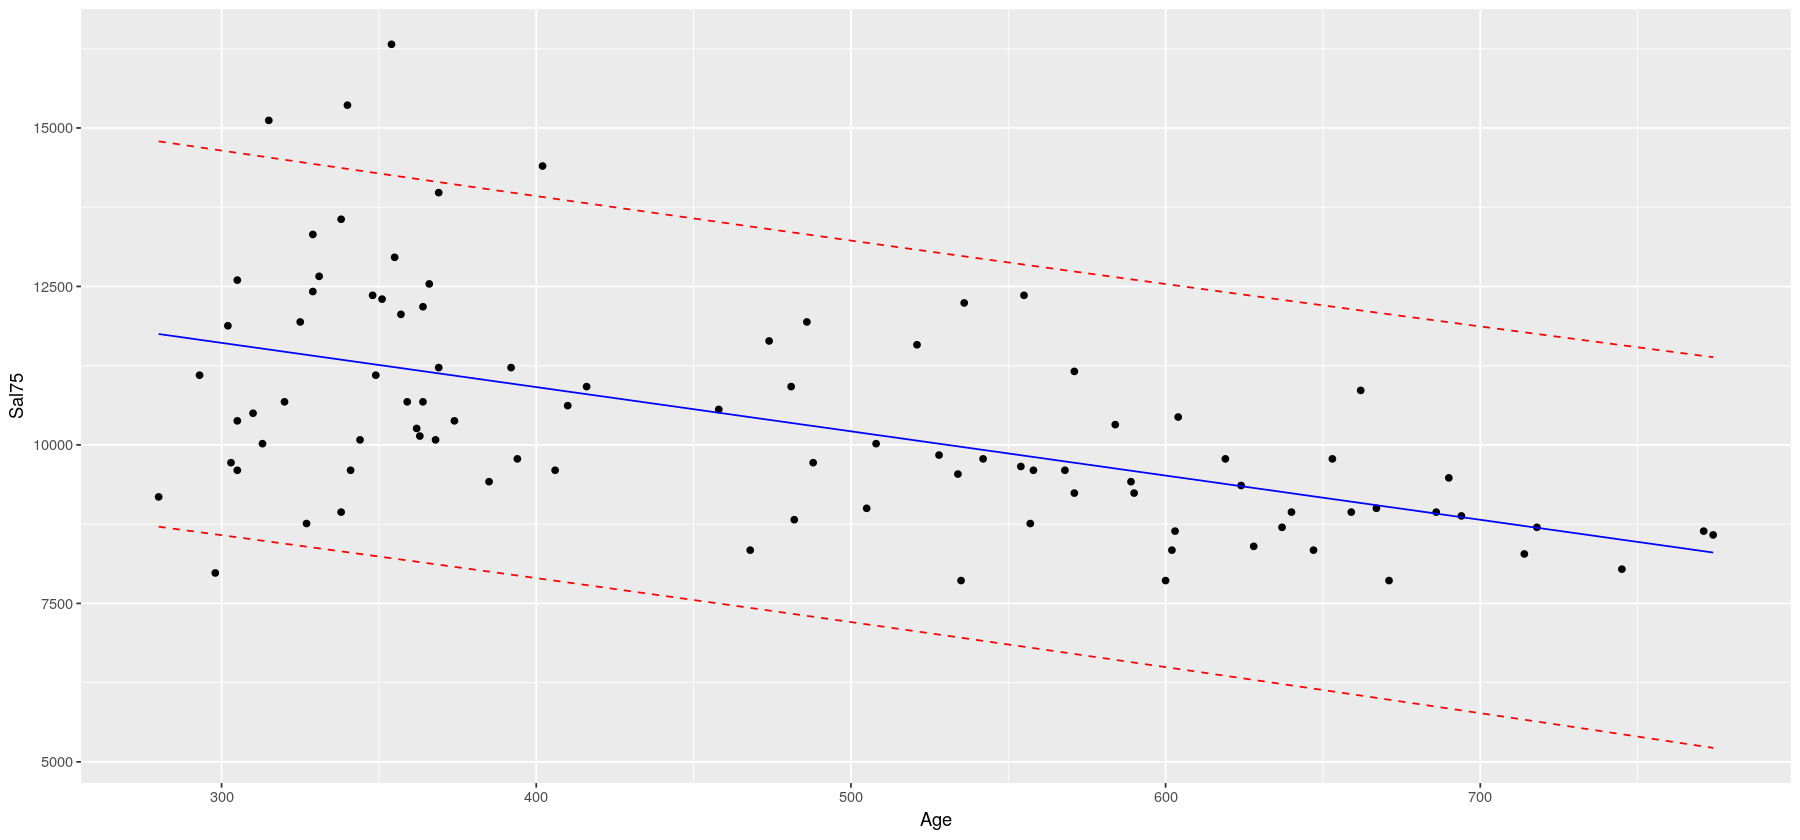

In [74]:
tmp = predict(fit_numeric, interval="prediction")
df_numeric = cbind(df, tmp)
ggplot(df_numeric, aes(x=Age, y=Sal75)) +
    geom_point() +
    geom_line(aes(y=fit), color="blue") +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

Z grafu je vidƒõt, ≈æe nƒõjak√° z√°vislost tam je. S rostouc√≠m vƒõkem zamƒõstnanc≈Ø jejich plat p≈ôekvapivƒõ kles√°. Nem≈Ø≈æeme s jistotou ≈ô√≠ci p≈ô√≠ƒçinu t√©to z√°vislosti, ale nap≈ô√≠klad to m≈Ø≈æe b√Ωt to, ≈æe si banka v√≠ce cen√≠ mlad≈°√≠ch zamƒõstnanc≈Ø kv≈Øli tomu, ≈æe mohou potenci√°lnƒõ b√Ωt flexibilnƒõj≈°√≠ a ochotnƒõj≈°√≠ se p≈ôizp≈Øsobovat. Pro lep≈°√≠ porozumƒõn√≠ modelu se pod√≠v√°me na *summary*. Je pot≈ôeba m√≠t na pamƒõti, ≈æe je o dost v√≠ce ≈æen ne≈æ mu≈æ≈Ø a tato tendence by mohla existovat jen u ≈æen a b√Ωt opaƒçn√° u mu≈æ≈Ø. V tuhle chv√≠li tuto mo≈ænost nech√°me b√Ωt a rozebereme to v pozdƒõj≈°√≠ch √∫loh√°ch. 

In [75]:
summary(fit_numeric)


Call:
lm(formula = Sal75 ~ Age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3643.9 -1030.3  -168.0   847.8  5086.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13703.562    553.968  24.737  < 2e-16 ***
Age            -6.979      1.120  -6.229 1.43e-08 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1507 on 91 degrees of freedom
Multiple R-squared:  0.2989,	Adjusted R-squared:  0.2912 
F-statistic:  38.8 on 1 and 91 DF,  p-value: 1.429e-08


Odhad interceptu je 13703 a odhad koeficientu vƒõku je zhruba -7. To n√°m ≈ô√≠k√°, ≈æe p≈ôi nulov√©m vƒõku by odhadovan√Ω plat byl 13703 USD a s ka≈æd√Ωm dal≈°√≠m mƒõs√≠cem vƒõku by klesal o 7 USD.

Z *p* hodnoty u koeficient≈Ø je vidƒõt, ≈æe test o jejich nulovosti vych√°z√≠ v√Ωznamnƒõ, tak≈æe vysvƒõtlovan√° promƒõnn√° na vybr√°n√© regresoru z√°vis√≠.

Rezidua jsou trochu v√Ωch√Ωlen√© na jednu stranu - M≈Ø≈æe to b√Ωt vych√Ωlen√© managementem - ti berou ƒçasto o dost v√≠ce ne≈æ ≈ôadov√≠ zamƒõstnanci a vysvƒõtlovalo by to vysok√° kladn√° rezidua. Pr≈Ømƒõrnƒõ jsou ale z√°porn√° rezidua vy≈°≈°√≠, jeliko≈æ p√°r vysoce placen√Ωch zamƒõstnanc≈Ø t√°hne pr≈Ømƒõr nahoru a vƒõt≈°ina zamƒõstnanc≈Ø pot√© m√° plat ni≈æ≈°√≠ ne≈æ odhad. 

Koeficient determinace vych√°z√≠ 0.2989. Urƒçuje jak dob≈ôe model p≈ôedpov√≠d√° variabilitu vysvƒõtlovan√© promƒõnn√© (0 znamen√°, ≈æe v≈Øbec, jen se ≈ô√≠d√≠ pr≈Ømƒõrem, 1 znamen√°, ≈æe model perfektnƒõ odhaduje hodnoty vysvƒõtlovan√© promƒõnn√©, tak≈æe si dob≈ôe porad√≠ i s odlehl√Ωmi hodnotami). Hodnota 0.2989 znamen√°, ≈æe m√° n√°≈° model chybu oproti pr≈Ømƒõrov√©mu modelu men≈°√≠ jen o ~30%, tak≈æe se nechov√° o moc l√©pe ne≈æ pr≈Ømƒõr. To tedy nen√≠ moc slavn√Ω v√Ωsledek. Adjustovan√Ω koeficient determinace, kter√Ω penalizuje slo≈æitost modelu, vych√°z√≠ je≈°tƒõ o nƒõco h≈Ø≈ô. 

Tyto hodnoty nejsou nejlep≈°√≠ a i z grafu v√Ω≈°e je vidƒõt, ≈æe odhady nejsou moc p≈ôesn√©. To je vidƒõt i z p√°su spolehlivosti pro n√°≈° model, kter√Ω je tak√© dost ≈°irok√Ω. Vƒõk vysvƒõtluje chov√°n√≠ platu v roce 1975 pouze z ƒç√°sti. To d√°va pomƒõrnƒõ smysl, jeliko≈æ vƒõk nen√≠ zrovna dobr√Ω ukazatel schopnost√≠ a kompetenc√≠. Roli m≈Ø≈æe tak√© hr√°t vzdƒõl√°n√≠, a mnoho dal≈°√≠ch aspekt≈Ø, kter√© v tomto modelu nejsou zohlednƒõny (a nƒõkter√© ani nejsou v datasetu, chyb√≠ ukazatel kompetence, schopnost√≠, v√Ω≈°e pozice).

### √öloha 3

D√°le prozkoum√°me z√°vlislost vysvƒõtlovan√© promƒõnn√© na pohlav√≠, nejprve jednodnoduch√Ωm boxplotem.

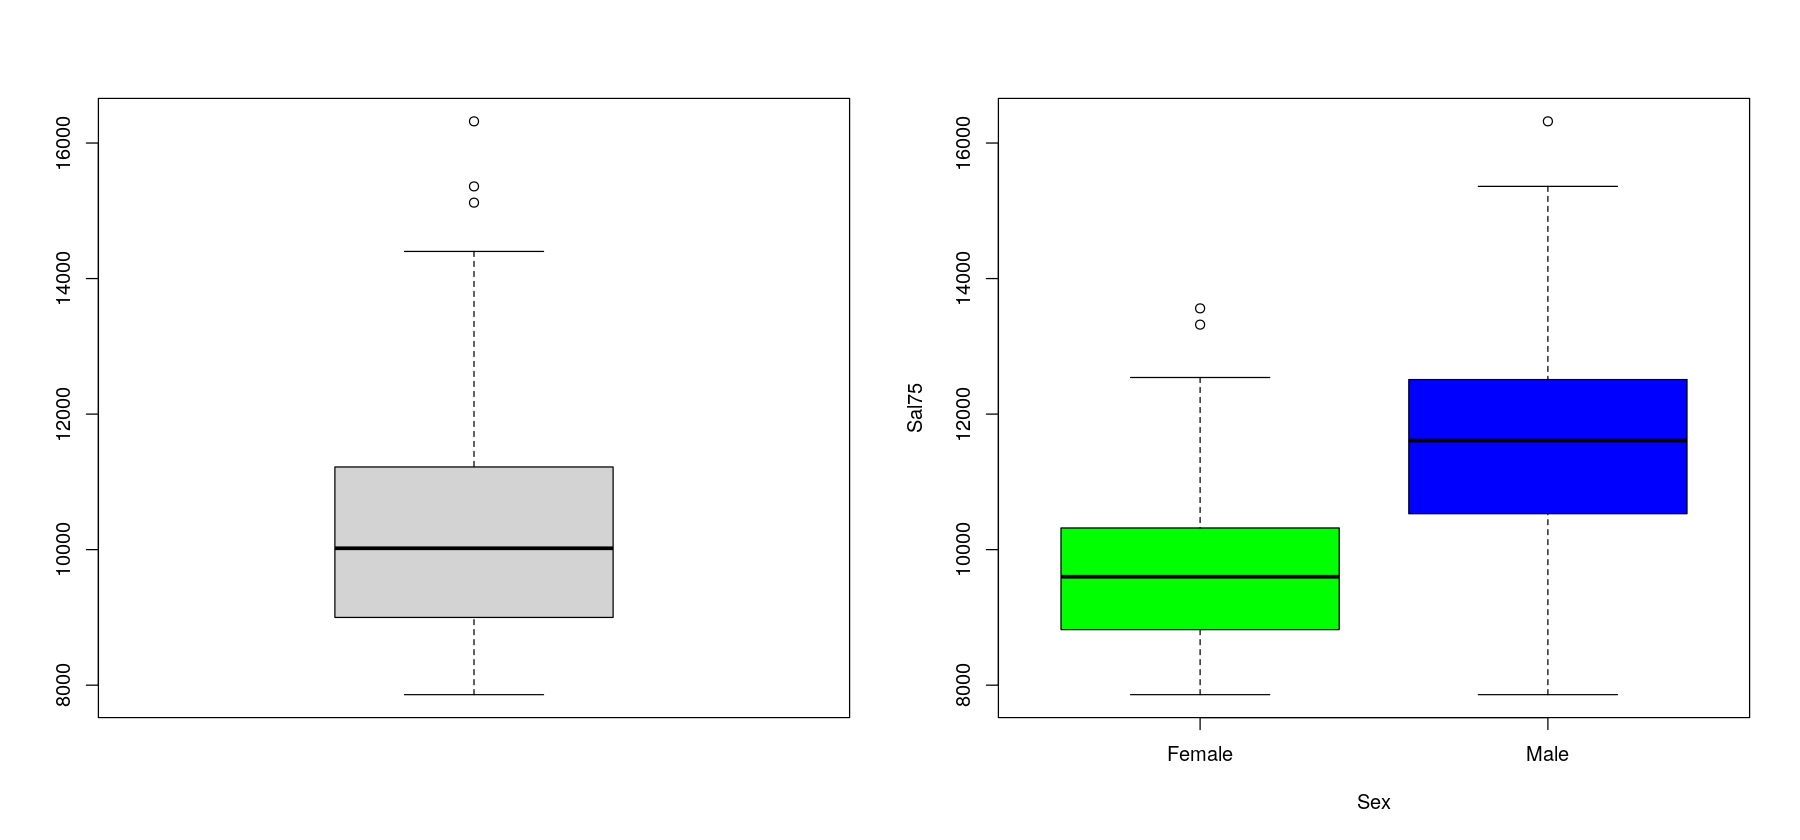

In [76]:
par(mfrow=c(1,2))
boxplot(df$Sal75)
boxplot(Sal75~Sex,col=c("green","blue"), data=df)

Hned na prvn√≠ pohled je vidƒõt, ≈æe platy mu≈æ≈Ø jsou v√Ωraznƒõ vy≈°≈°√≠, ne≈æ platy ≈æen. Medi√°n u mu≈æ≈Ø je lehce pod 12000 USD, kde≈æto u ≈æen pouze kousek pod 10000 USD. 

Na lev√©m grafu, kde je zn√°zornƒõn plat obou pohlav√≠ dohromady, to vypad√°, ≈æe celkov√Ω medi√°n je podobn√Ω, jako medi√°n plat≈Ø samotn√Ωch ≈æen, ale to je d√°no t√≠m, ≈æe ≈æen je v datasetu dvakr√°t v√≠ce ne≈æ mu≈æ≈Ø.

Pod√≠v√°me se na hodnoty v ƒç√≠slech.

In [77]:
by(df$Sal75,df$Sex,summary)

df$Sex: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7860    8820    9600    9717   10320   13560 
------------------------------------------------------------ 
df$Sex: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7860   10605   11610   11681   12465   16320 

ƒå√≠sla odpov√≠daj√≠ boxplotu v√Ω≈°e. Medi√°n (i cel√© mezikvartilov√© rozpƒõt√≠) je u mu≈æ≈Ø posunut√© o dva tis√≠ce USD v√Ω≈°e, ne≈æ u ≈æen.

D√°le zkus√≠me otestovat shodu st≈ôedn√≠ch hodnot pomoc√≠ regresn√≠ho modelu.

In [78]:
fit_sex = lm(df$Sal75~df$Sex)
summary(fit_sex)


Call:
lm(formula = df$Sal75 ~ df$Sex)

Residuals:
    Min      1Q  Median      3Q     Max 
-3821.3  -957.0  -117.0   678.7  4638.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9717.0      196.2  49.526  < 2e-16 ***
df$SexMale    1964.2      334.5   5.872 6.92e-08 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1532 on 91 degrees of freedom
Multiple R-squared:  0.2748,	Adjusted R-squared:  0.2669 
F-statistic: 34.49 on 1 and 91 DF,  p-value: 6.925e-08


I z tohoto modelu je vidƒõt to sam√©, co v√Ω≈°e. Odhad st≈ôedn√≠ hodnoty plat≈Ø u ≈æen je 9717 USD a u mu≈æ≈Ø je o 1964 USD vy≈°≈°√≠ (odhad mu≈æsk√©ho platu se z√≠sk√° tak, ≈æe se vezme intercept - st≈ôedn√≠ hodnota ≈æensk√©ho platu - a p≈ôiƒçte se k nƒõmu 1964).

Z√°rove≈à je vidƒõt, ≈æe test o nulovosti p≈ô√≠znak≈Ø vych√°z√≠ v√Ωznamnƒõ, tak≈æe v≈°echny p≈ô√≠znaky p≈ôisp√≠vaj√≠ k odhadu vysvƒõtlovan√© promƒõnn√©.

Tak√© si m≈Ø≈æeme v≈°imnout, ≈æe i kdy≈æ model predikuje plat pouze na z√°kladƒõ pohlav√≠, tak m√° adjustovan√Ω koeficient determinace hodnotu 0.2669, co≈æ je skoro stejnƒõ jako u modelu v√Ω≈°e, kde se plat predikoval pomoc√≠ vƒõku.

P≈ôejdeme k metodƒõ anal√Ωzy rozptylu.

In [79]:
aov(data=df, Sal75~Sex)

Call:
   aov(formula = Sal75 ~ Sex, data = df)

Terms:
                      Sex Residuals
Sum of Squares   80978301 213680641
Deg. of Freedom         1        91

Residual standard error: 1532.364
Estimated effects may be unbalanced

Souƒçet ƒçtverc≈Ø vysvƒõtlen√Ω rozd√≠ly pr≈Ømƒõr≈Ø mu≈æ≈Ø a ≈æen je asi 80 mil. A rezidu√°ln√≠ souƒçet ƒçtverc≈Ø (variabilita, kterou model nebyl schopen podchytit) je zhruba 213 mil. Z toho lze soudit, ≈æe hodnoty plat≈Ø ≈æen a mu≈æ≈Ø budou m√≠t rozd√≠ln√© st≈ôedn√≠ hodnoty, ale model spol√©haj√≠c√≠ se jen na pohlav√≠ nebude √∫plnƒõ p≈ôesn√Ω, jeliko≈æ je v jednotliv√Ωch kategori√≠ch velk√° variabilita. Rozd√≠l ve st≈ôedn√≠ch hodnot√°ch kategori√≠ otestujeme pomoc√≠ F-testu anal√Ωzy rozptylu, kter√Ω m√° za nulovou hypot√©zu shodu st≈ôedn√≠ch hodnot jednotliv√Ωch kategori√≠.

In [80]:
anova(fit_sex)

Df Sum Sq    Mean Sq  F value  Pr(>F)      
df$Sex     1  80978301 80978301 34.48616 6.924807e-08
Residuals 91 213680641  2348139       NA           NA

Vzhledem k tomu, ≈æe je p hodnota prakticky nulov√° na hladinƒõ v√Ωznamnosti ùõº = 5% zam√≠tneme nulovou hypot√©zu ve prospƒõch alternativy, ≈æe st≈ôedn√≠ hodnoty plat≈Ø jsou pro mu≈æe a ≈æeny odli≈°n√©. Test potvrzuje na≈°√≠ domnƒõnku, ≈æe maj√≠ mu≈æi a ≈æeny rozd√≠lnƒõ vysokou st≈ôedn√≠ hodnotu platu, i kdy≈æ se ve v√Ω≈°i platu odr√°≈æ√≠ mnoho dal≈°√≠ch faktor≈Ø.

### √öloha 4

Vytvo≈ô√≠me si dal≈°√≠ model, ve kter√©m zkombinuje oba v√Ω≈°e pou≈æit√© p≈ô√≠znaky. 

In [81]:
fit_mix = lm(Sal75~Age*Sex, df)

Warning message in predict.lm(fit_mix, interval = "prediction"):
‚Äúpredictions on current data refer to _future_ responses
‚Äù


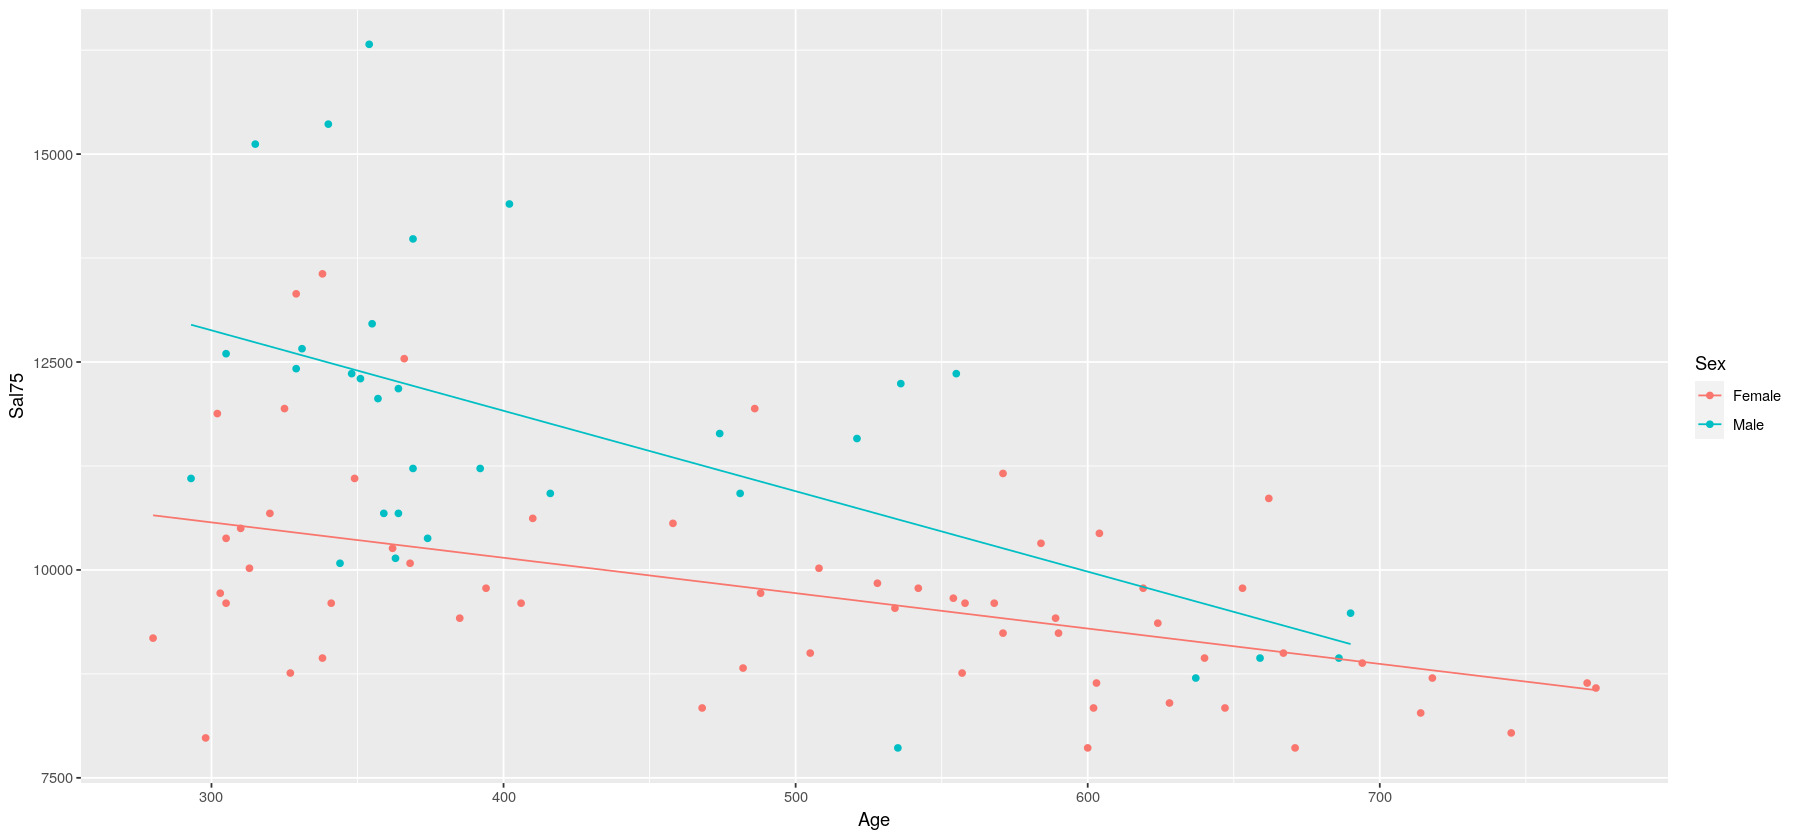

In [82]:
tmp = predict(fit_mix, interval="prediction")
df_mix = cbind(df, tmp)
ggplot(df_mix, aes(x=Age, y=Sal75, group=Sex, color=Sex)) +
    geom_point() +
    geom_line(aes(y=fit))

Predikce vypadaj√≠ o nƒõco l√©pe ne≈æ v modelu, kde byl pouze vƒõk, ale po≈ô√°d to nen√≠ √∫plnƒõ nejlep≈°√≠. Na druhou stranu jde hezky pozorovat, ≈æe mu≈æsk√Ω plat b√Ωv√° v√Ωraznƒõ vy≈°≈°√≠, ne≈æ u ≈æen a je stejnƒõ jako u druh√©ho √∫kolu vidƒõt, ≈æe s vƒõkem u obou pohlav√≠ s vƒõkem lehce kles√° v√Ω≈°e platu.

Pod√≠v√°me se na hodnoty jednotliv√Ωch koeficient≈Ø a koeficient determinace.

In [83]:
summary(fit_mix)


Call:
lm(formula = Sal75 ~ Age * Sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2747.7  -776.0   -87.3   516.5  3961.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11847.933    604.725  19.592  < 2e-16 ***
Age            -4.255      1.160  -3.666 0.000418 ***
SexMale      3934.132   1069.209   3.679 0.000400 ***
Age:SexMale    -5.417      2.319  -2.336 0.021721 *  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1304 on 89 degrees of freedom
Multiple R-squared:  0.4864,	Adjusted R-squared:  0.4691 
F-statistic: 28.09 on 3 and 89 DF,  p-value: 7.122e-13


Intercept vych√°z√≠ 11847. To znamen√°, ≈æe p≈ôi nulov√©m vƒõku se plat pro ≈æeny odhaduje touto hodnotou. Pokud bychom chtƒõli stejn√Ω odhad u mu≈æ≈Ø, museli bychom nav√≠c p≈ôiƒç√≠st hodnotu *SexMale*. Odhadovan√Ω plat pro mu≈æe nulov√©ho vƒõku je tedy o 3934 USD vy≈°≈°√≠, ne≈æ pro ≈æeny. 

Kdy≈æ se potom pod√≠v√°me, jak se vysvƒõtlovan√° promƒõnn√° mƒõn√≠ s vƒõkem, vid√≠me, ≈æe u ≈æen s ka≈æd√Ωm dal≈°√≠m mƒõs√≠cem odhad platu kles√° o 4.2 USD, kde≈æto u mu≈æ≈Ø o dal≈°√≠ch 5.4 USD nav√≠c, tak≈æe celkem o 9.6 USD.

To odpov√≠d√° grafu v√Ω≈°e - p≈ô√≠mka, kter√° odhaduje mu≈æsk√Ω plat, zaƒç√≠n√° v√Ω≈°e ne≈æ u ≈æen, ale zase rychleji kles√°.

*p* hodnoty u v≈°ech koeficient≈Ø jsou men≈°√≠ ne≈æ 0.05, tak≈æe u v≈°ech na standartn√≠ hladinƒõ zam√≠t√°me hypot√©zu o jejich nulovosti ve prospƒõch alternativn√≠ hypot√©zy, ≈æe nulov√© nejsou. To znamen√°, ≈æe v≈°echny p≈ô√≠znaky (nebo jejich kombinace) jsou u≈æiteƒçn√© a zlep≈°uj√≠ kvalitu modelu)

Adjustovan√Ω koeficient determinace vy≈°el 0.4691, co≈æ je t√©mƒõ≈ô dvojn√°sobn√© zlep≈°en√≠ oproti p≈ôedchoz√≠m model≈Øm a odr√°≈æ√≠ to fakt, ≈æe v platu hraje roli v√≠ce faktor≈Ø. Po≈ô√°d je ale pomƒõrnƒõ n√≠zk√Ω a nejsme st√°le schopni dob≈ôe podchytit variabilitu modelu o co≈æ se pokus√≠me v n√°sleduj√≠c√≠ ƒç√°sti.

### √öloha 5

Nejprve zkus√≠me slo≈æit√Ω model, kter√Ω zkou≈°√≠ r≈Øzn√© interakce. Vybereme p≈ôedchoz√≠ regresory `Age` `Sex` a p≈ôid√°me spojit√© regresory `Educ`, `Exper` a `Senior`.

In [84]:
fit_all = lm(Sal75~Age*Sex*Educ*Exper*Senior, df)
summary(fit_all)


Call:
lm(formula = Sal75 ~ Age * Sex * Educ * Exper * Senior, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2565.8  -508.2     6.5   427.1  3210.7 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                   -1.230e+05  9.696e+04  -1.268  0.20954   
Age                            1.944e+02  1.701e+02   1.143  0.25755   
SexMale                        4.844e+05  3.192e+05   1.518  0.13429   
Educ                           1.191e+04  8.156e+03   1.460  0.14935   
Exper                          6.160e+02  7.059e+02   0.873  0.38625   
Senior                         1.443e+03  1.083e+03   1.333  0.18759   
Age:SexMale                   -2.064e+03  9.988e+02  -2.067  0.04299 * 
Age:Educ                      -1.838e+01  1.440e+01  -1.276  0.20671   
SexMale:Educ                  -2.776e+04  2.265e+04  -1.225  0.22517   
Age:Exper                     -7.850e-01  1.104e+00  -0.711  0.47982   
SexMale:Exper            

P≈ôi zahrnut√≠ v≈°ech mo≈æn√Ωch interakc√≠ jsou rezidu√°ly ni≈æ≈°√≠ ne≈æ u na≈°ich p≈ôedchoz√≠ch model≈Ø a koeficient determinace je vy≈°≈°√≠, co≈æ naznaƒçuje vy≈°≈°√≠ p≈ôesnost modelu. Kdy≈æ se ale pod√≠v√°me na adjustovan√Ω koeficient determinace, vid√≠me, ≈æe nen√≠ o moc lep≈°√≠ ne≈æ n√°≈° p≈ôedchoz√≠ model a mohlo by to naznaƒçovat p≈ôetr√©novanost na≈°eho modelu. Zkus√≠me model tedy zjednodu≈°it, to ≈æe bude p≈ô√≠padnƒõ o trochu hor≈°√≠ n√°m nevad√≠, bude alespo≈à interpretovateln√Ω. Natr√©nujeme si model s regresory ***Age***, ***Sex***, ***Educ***, ***Exper*** a ***Senior***. Zahrneme tak√© interakci mezi ***age*** a ***sex***, jeliko≈æ n√°m v p≈ôedchoz√≠ √∫loze vy≈°la v√Ωznamnƒõ.

In [85]:
fit_final = lm(Sal75~Age*Sex+Educ+Exper+Senior, df)
summary(fit_final)


Call:
lm(formula = Sal75 ~ Age * Sex + Educ + Exper + Senior, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2583.7  -846.3   -95.9   567.5  4164.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9328.6175  1654.9660   5.637 2.16e-07 ***
Age           -4.1418     1.8159  -2.281  0.02503 *  
SexMale     3641.0816  1147.0951   3.174  0.00209 ** 
Educ         153.5293    63.1643   2.431  0.01715 *  
Exper          0.5761     2.9457   0.196  0.84540    
Senior         6.9642    13.5718   0.513  0.60917    
Age:SexMale   -5.3107     2.5951  -2.046  0.04377 *  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1280 on 86 degrees of freedom
Multiple R-squared:  0.5219,	Adjusted R-squared:  0.4886 
F-statistic: 15.65 on 6 and 86 DF,  p-value: 4.64e-12


Vid√≠me, ≈æe se n√°m trochu zvƒõt≈°ily rezidu√°ly a s nimi n√°m i klesnul koeficient determinace, ale podstatn√© je, ≈æe adjustovan√Ω koeficient determinace se moc nezhor≈°il. P≈ôedpokl√°dejme normalitu odchylek a otestujme, jestli lze redukovat model s interakcemi na jednodu≈°≈°√≠. Nev√Ωznamnƒõ vy≈°ly regresory ***Exper*** a ***Senior***. Je pravdƒõpodobn√©, ≈æe  tyto dva regresory spolu s vƒõkem mezi sebou koreluj√≠.

In [86]:
cor(model.matrix(fit_final))

Warning message in cor(model.matrix(fit_final)):
‚Äúthe standard deviation is zero‚Äù


(Intercept) Age         SexMale     Educ        Exper      
(Intercept)  1                   NA          NA          NA          NA
Age         NA           1.00000000 -0.26175147 -0.22525298  0.79787476
SexMale     NA          -0.26175147  1.00000000  0.32731475  0.01697046
Educ        NA          -0.22525298  0.32731475  1.00000000 -0.10117309
Exper       NA           0.79787476  0.01697046 -0.10117309  1.00000000
Senior      NA          -0.18448263  0.09776089  0.05984385 -0.07466085
Age:SexMale NA          -0.09502744  0.94836990  0.26097308  0.21471409
            Senior      Age:SexMale
(Intercept)          NA          NA
Age         -0.18448263 -0.09502744
SexMale      0.09776089  0.94836990
Educ         0.05984385  0.26097308
Exper       -0.07466085  0.21471409
Senior       1.00000000  0.12363651
Age:SexMale  0.12363651  1.00000000

Regresor ***Exper*** m√° silnou pozitivn√≠ korelaci s vƒõkem a jeho P-hodnota je pravdƒõpodobnƒõ kv≈Øli tomu nejvy≈°≈°√≠ a mƒõl by m√≠t nejmen≈°√≠ vliv na predikci. Korelace vƒõku a zku≈°enost√≠ d√°v√° smysl, z√≠skat zku≈°enosti nƒõjakou dobu trv√° a proto v√≠ce zku≈°enostem bude odpov√≠dat vy≈°≈°√≠ vƒõk zamƒõstnance. Zkus√≠me ***Exper*** proto odebrat, ale nejdr≈ô√≠ve je≈°tƒõ otestujeme, zda-li se n√°m model moc nezhor≈°il oproti poƒç√°teƒçn√≠mu. 

In [87]:
anova(fit_final,fit_all)

Res.Df RSS       Df Sum of Sq F        Pr(>F)   
1 86     140863296 NA       NA        NA        NA
2 61      91969722 25 48893573  1.297169 0.2032376

I p≈ôesto, ≈æe rozd√≠l mezi rezidu√°ln√≠mi souƒçty ƒçtverc≈Ø je pomƒõrnƒõ vysok√Ω, podle p hodnoty, kter√° vy≈°la cca 0.20, mezi modely nen√≠ statisticky v√Ωznamn√Ω rozd√≠l a vystaƒç√≠me si tedy s jednodu≈°≈°√≠m modelem. P≈ôejdeme tedy k dal≈°√≠mu zjednodu≈°ov√°n√≠ modelu, zaƒçneme regresorem ***Exper***.

In [88]:
fit_final_2 = lm(Sal75~Age*Sex+Educ+Senior, df)
summary(fit_final_2)


Call:
lm(formula = Sal75 ~ Age * Sex + Educ + Senior, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2592.1  -845.6   -76.9   556.9  4154.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9235.066   1575.552   5.861 8.05e-08 ***
Age           -3.872      1.173  -3.302  0.00139 ** 
SexMale     3569.310   1080.789   3.303  0.00139 ** 
Educ         154.505     62.618   2.467  0.01557 *  
Senior         7.015     13.494   0.520  0.60451    
Age:SexMale   -5.092      2.329  -2.187  0.03146 *  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1273 on 87 degrees of freedom
Multiple R-squared:  0.5217,	Adjusted R-squared:  0.4942 
F-statistic: 18.98 on 5 and 87 DF,  p-value: 1.018e-12


Model m√° dokonce o trochu lep≈°√≠ adjustovan√Ω koeficient determinace a z√°rove≈à regresor ***Senior*** st√°le vych√°z√≠ nev√Ωznamnƒõ. Zkus√≠me ho odstranit tak√©. 

In [89]:
fit_final_3 = lm(Sal75~Age*Sex+Educ, df)
summary(fit_final_3)


Call:
lm(formula = Sal75 ~ Age * Sex + Educ, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2600.4  -794.3   -73.0   533.1  4256.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9871.778    986.878  10.003 3.54e-16 ***
Age           -4.022      1.132  -3.553 0.000614 ***
SexMale     3461.640   1056.348   3.277 0.001503 ** 
Educ         155.385     62.335   2.493 0.014548 *  
Age:SexMale   -4.834      2.266  -2.133 0.035672 *  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1267 on 88 degrees of freedom
Multiple R-squared:  0.5202,	Adjusted R-squared:  0.4984 
F-statistic: 23.86 on 4 and 88 DF,  p-value: 2.203e-13


Adjustovan√Ω koeficient determinace je opƒõt o kousek vy≈°≈°√≠. Nyn√≠ ji≈æ v≈°echny regresory vych√°z√≠ v√Ωznamnƒõ. Mƒõli bychom nyn√≠ otestovat, zda-li je mezi t√≠mto modelem a poƒç√°teƒçn√≠m modelem statisticky v√Ωznamn√Ω rozd√≠l.

In [90]:
anova(fit_final_3,fit_all)

Res.Df RSS       Df Sum of Sq F        Pr(>F)   
1 88     141363656 NA       NA        NA        NA
2 61      91969722 27 49393933  1.213374 0.2619713

Mezi poƒç√°teƒçn√≠m, obs√°hl√Ωm modelem a fin√°ln√≠m modelem nen√≠ statisticky v√Ωznamn√Ω rozd√≠l. M≈Ø≈æeme tedy pou≈æ√≠vat tento zjednodu≈°en√Ω model a znovu se na nƒõj pod√≠v√°me a zhodnot√≠me ho.

In [91]:
fit_final = lm(Sal75~Age*Sex+Educ, df)
summary(fit_final)


Call:
lm(formula = Sal75 ~ Age * Sex + Educ, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2600.4  -794.3   -73.0   533.1  4256.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9871.778    986.878  10.003 3.54e-16 ***
Age           -4.022      1.132  -3.553 0.000614 ***
SexMale     3461.640   1056.348   3.277 0.001503 ** 
Educ         155.385     62.335   2.493 0.014548 *  
Age:SexMale   -4.834      2.266  -2.133 0.035672 *  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1267 on 88 degrees of freedom
Multiple R-squared:  0.5202,	Adjusted R-squared:  0.4984 
F-statistic: 23.86 on 4 and 88 DF,  p-value: 2.203e-13


In [92]:
round(fit_final$coef, 3)

(Intercept)         Age     SexMale        Educ Age:SexMale 
   9871.778      -4.022    3461.640     155.385      -4.834

Nejv√Ωznamƒõj≈°√≠ regresor je ***Age***. S ka≈æd√Ωm mƒõs√≠cem vƒõku se plat zamƒõstnance sni≈æuje o 4 dolary, z√°rove≈à interakce ***Age:SexMale*** ≈ô√≠k√°, ≈æe mu≈æi s ka≈æd√Ωm dal≈°√≠m mƒõs√≠cem vƒõku berou o dal≈°√≠ch t√©mƒõ≈ô 5 USD m√©nƒõ. Celkem tedy mu≈æ≈Øm plat kles√° s vƒõkem o 9 USD za mƒõs√≠c. Velmi v√Ωznamn√Ω regresor je tak√© ***SexMale***. Pokud je zamƒõstanec mu≈æ, tak podle modelu dost√°v√° plat o 3450 dolar≈Ø vy≈°≈°√≠. V√Ωznamn√© je tak√© vzdƒõlan√≠ (***Educ***) - s ka≈æd√Ωm rokem vzdƒõlan√≠ dostane zamƒõstnanec o 155 dolar≈Ø v√≠ce. 

Pohledem na koeficient determinace ov≈°em zjist√≠me, ≈æe model m√° k dokonalosti daleko a velkou ƒç√°st variance nedok√°≈æe vysvƒõtlit. V datech nen√≠ promƒõnn√°, kter√° by o zamƒõstnanci prozradila na jak vysok√© pozici je v r√°mci organizace nebo jak je kompetentn√≠.

### √öloha 6

Pomoc√≠ vhodn√Ωch test≈Ø ovƒõ≈ô√≠me p≈ôedpoklady metod, kter√© jsme pou≈æili

Pro redukci modelu je t≈ôeba dodr≈æet p≈ôedpoklad normality jeho odchylek. Otestujeme model `fit_all`, kter√Ω jsme redukovali na n√°≈° fin√°ln√≠ model. 

In [93]:
shapiro.test(fit_all$resid)


	Shapiro-Wilk normality test

data:  fit_all$resid
W = 0.97721, p-value = 0.1033


Nezam√≠t√°me test normality odchylek modelu a redukce modelu tedy byla provedena spr√°vnƒõ.

Je≈°tƒõ je pot≈ôeba dodr≈æet p≈ôepoklady regresn√≠ho modelu.
   * regresory by mƒõly b√Ωt navz√°jem co nejv√≠ce nez√°visl√© - matici $\mathbf{X}^T\mathbf{X}$ lze pak dob≈ôe invertovat.
   * odchylky by mƒõly b√Ωt norm√°lnƒõ rozdƒõlen√© se st≈ôedn√≠ hodnotou 0 a homoskedastick√Ωm(konstantn√≠m) rozptylem a je pot≈ôeba zkontrolovat, zda-li jsou rezidua dob≈ôe vysvƒõtlena modelem.

In [94]:
cor(model.matrix(fit_final))

Warning message in cor(model.matrix(fit_final)):
‚Äúthe standard deviation is zero‚Äù


(Intercept) Age         SexMale    Educ       Age:SexMale
(Intercept)  1                   NA         NA         NA          NA
Age         NA           1.00000000 -0.2617515 -0.2252530 -0.09502744
SexMale     NA          -0.26175147  1.0000000  0.3273148  0.94836990
Educ        NA          -0.22525298  0.3273148  1.0000000  0.26097308
Age:SexMale NA          -0.09502744  0.9483699  0.2609731  1.00000000

Regresory na sobƒõ nejsou v√Ωznamnƒõ z√°visl√©, t√©mƒõ≈ô spolu nekoreluj√≠. Jedinou v√Ωjimkou je interakce ***Age:SexMale***, kter√° silnƒõ pozitivnƒõ koreluje se ***SexMale***. To ale nevad√≠, jeliko≈æ to je interakce, kter√° vych√°z√≠ z p≈Øvodn√≠ch p≈ô√≠znak≈Ø. D√° se tedy oƒçek√°vat jist√° korelace.

Nyn√≠ zb√Ωv√° otestovat v√Ω≈°e zm√≠nƒõn√© vlastnosti odchylek.

In [95]:
ols_test_breusch_pagan(fit_final)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

              Data                
 ---------------------------------
 Response : Sal75 
 Variables: fitted values of Sal75 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    13.33748 
 Prob > Chi2   =    0.0002601535 

Odm√≠t√°me hypot√©zu homoskedasticity v regresn√≠m modelu. Rozptyly jsou heteroskedastick√©, variance dat je promƒõnn√° v z√°vislosti na platu a nesplnili jsme tedy p≈ôedpoklad pro regresn√≠ model a na nov√Ωch datech by model nemusel b√Ωt p≈ôesn√Ω.  

Pro lep≈°√≠ p≈ôehled si rozptyly zobraz√≠me na grafu.

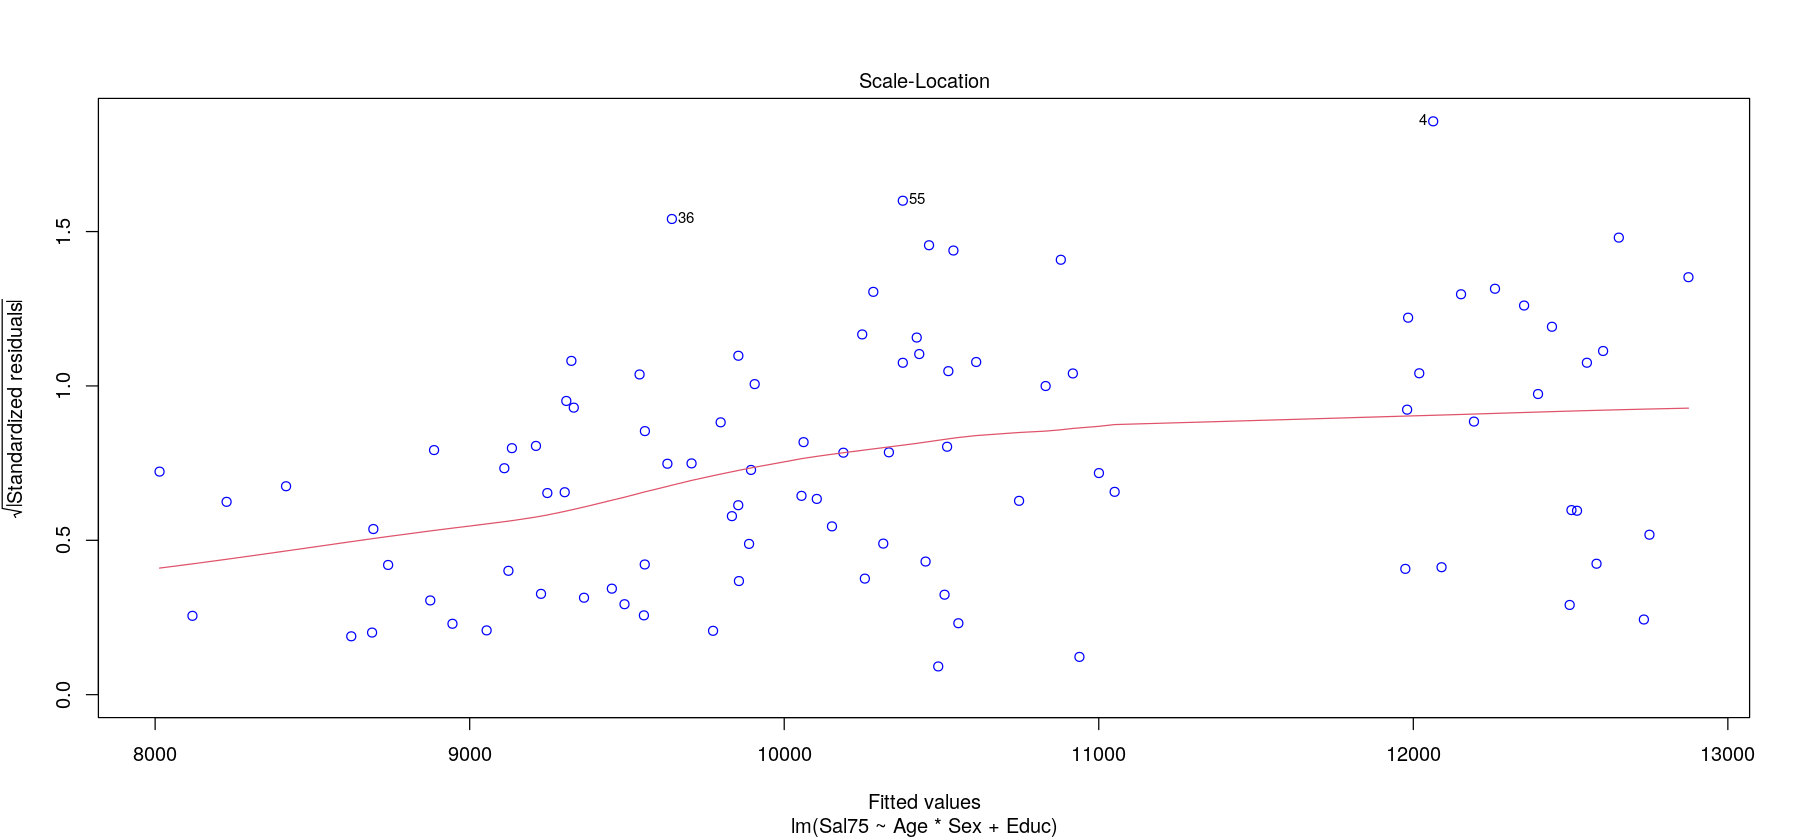

In [96]:
plot(fit_final, which=3, col=c("blue"))

Je vidƒõt, ≈æe s rostouc√≠m platem rostou rezidua. Mohlo by b√Ωt dobr√© pou≈æ√≠t robustn√≠ regresi, kter√° se um√≠ vypo≈ô√°dat s odlehl√Ωmi hodnotami, kte≈ô√≠ v na≈°em p≈ô√≠padƒõ m≈Ø≈æou b√Ωt nap≈ô. mana≈æe≈ôi, p≈ô√≠padnƒõ data vhodnƒõ transformovat.

In [97]:
ols_test_correlation(fit_final)

[1] 0.9795153

P≈ôipou≈°t√≠me, ≈æe jsou rezidua norm√°lnƒõ rozdƒõlen√° a ≈æe jsou dob≈ôe vysvƒõtlena modelem.